In [30]:
# %run collect.py

/var/folders/tv/v9p183mn2434hlc0_dgjlmpw0000gn/T/ipykernel_4607/3570900521.py:83: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  ax[1].loglog(*get_data(data[:, 0], data[:, 2] + 1e-2), marker=marker, linestyle=linestyle, color=color)


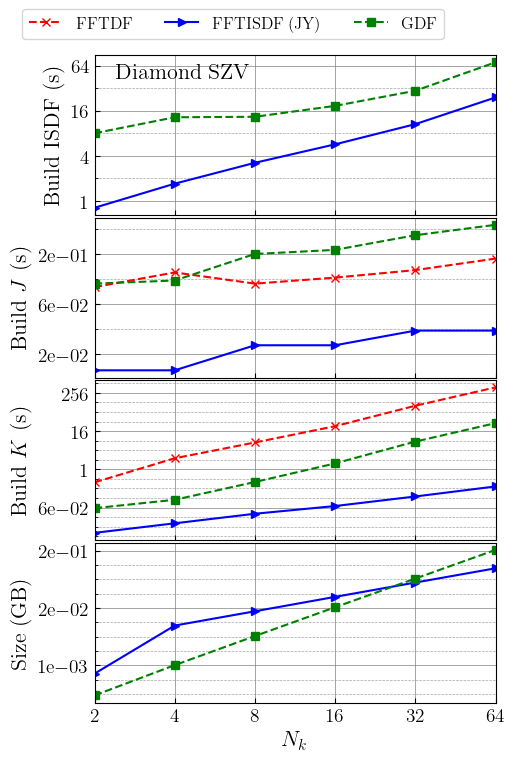

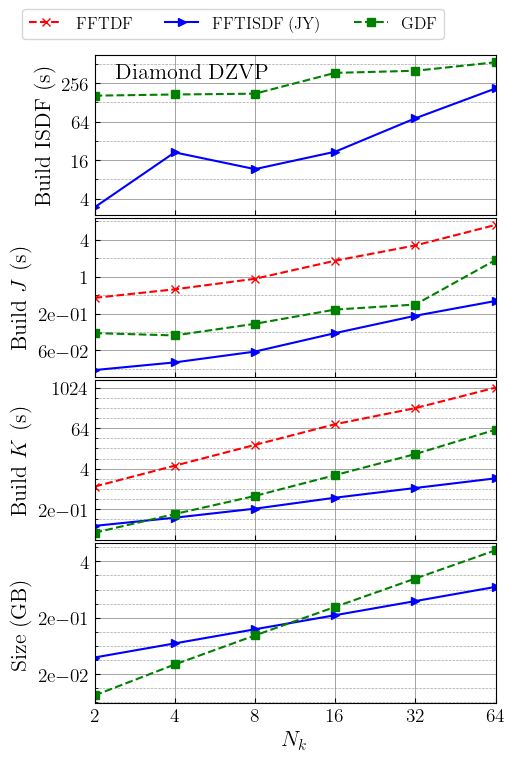

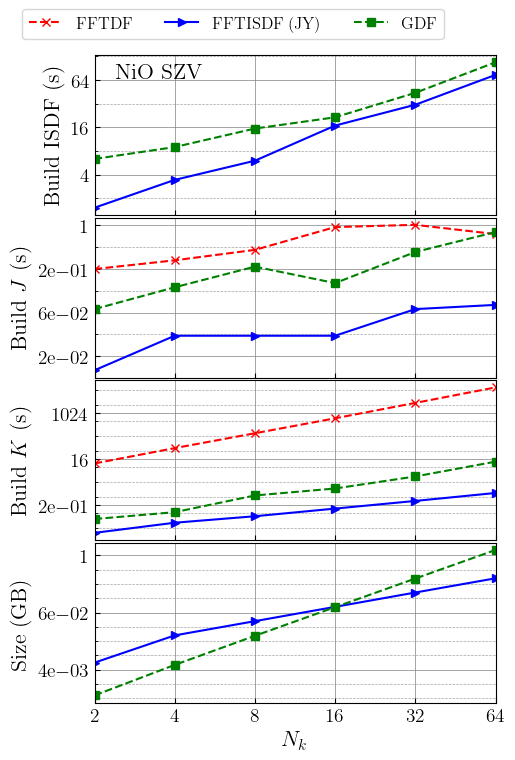

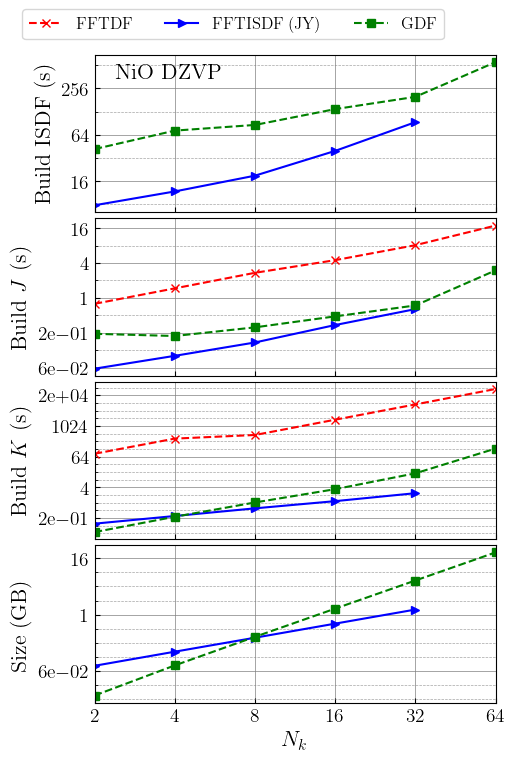

In [31]:
from utils import *

import os, sys, numpy, scipy
from matplotlib import pyplot as plt

if not os.path.exists("./figures"):
    os.makedirs("./figures")

def get_data(x0, y0):
    xx = []
    yy = []
    for ix in range(len(x0)):
        if not numpy.isnan(y0[ix]):
            xx.append(x0[ix])
            yy.append(y0[ix])
    return xx, yy

def plot_results(log):
    cell = os.path.basename(log).split("-")[0]
    if cell == "cco":
        cell = "CCO"
    elif cell == "nio":
        cell = "NiO"
    elif cell == "diamond":
        cell = "Diamond"
    else:
        raise ValueError("Unknown cell: %s" % cell)

    basis = log.split("gth-")[1].split("-")[0].upper()

    fig, ax = plt.subplots(4, 1, figsize=(5, 7), sharex=True, sharey=False)

    assert os.path.exists(log)
    lines = None
    with open(log) as f:
        lines = f.readlines()
    assert lines is not None

    is_title = lambda x: len(x) > 0 and x[0] == "#"

    count = 0
    is_label = False
    while count < len(lines):
        line = lines[count]
        if is_title(line):
            method = line.split(" ")[1]

            if "ning" in method:
                continue

            import io
            data = io.StringIO("".join(lines[count+1:count+8]))
            data = numpy.loadtxt(data, dtype=numpy.float64, delimiter=",", skiprows=1)
            
            count += 9

            marker = "o"
            linestyle = "-"
            if "yang" in method:
                if not "40-80" in method:
                    continue

                marker = ">"
                label = "FFTISDF"
                color = "blue"
            elif "gdf" in method:
                marker = "s"
                linestyle = "--"
                label = "GDF"
                color = "green"
            elif "fftdf" in method:
                if "120" not in method:
                    continue

                marker = "x"
                linestyle = "--"
                label = "FFTDF"
                color = "red"
            else:
                raise ValueError("Unknown method: %s" % method)

            ax[0].loglog(*get_data(data[:, 0], data[:, 1]), label=label, marker=marker, linestyle=linestyle, color=color)
            ax[1].loglog(*get_data(data[:, 0], data[:, 2] + 1e-2), marker=marker, linestyle=linestyle, color=color)
            ax[2].loglog(*get_data(data[:, 0], data[:, 3] + 1e-2), marker=marker, linestyle=linestyle, color=color)
            ax[3].loglog(*get_data(data[:, 0], data[:, 4]), marker=marker, linestyle=linestyle, color=color)

    # make the ticks to be 2^n
    # ax[-1].set_xscale("log", base=2)
    ax[-1].set_xlabel(f"$N_k$", fontsize=16)
    ax[-1].set_xlim(2, 64)

    ax[0].set_ylabel("Build ISDF (s)", fontsize=16)
    ax[1].set_ylabel(f"Build $J$ (s)", fontsize=16)
    ax[2].set_ylabel(f"Build $K$ (s)", fontsize=16)
    ax[3].set_ylabel("Size (GB)", fontsize=16)

    for x in ax:
        from matplotlib.ticker import LogLocator, NullLocator, LogFormatter
        from matplotlib.ticker import NullFormatter
        x.xaxis.set_major_locator(LogLocator(base=2, numticks=10))
        x.yaxis.set_major_locator(LogLocator(base=4, numticks=5))

        x.xaxis.set_major_formatter(LogFormatter(base=2))
        x.yaxis.set_major_formatter(LogFormatter(base=4))

        x.xaxis.set_minor_locator(NullLocator())
        x.yaxis.set_minor_locator(LogLocator(base=2, subs=(1.0,), numticks=20))

        x.xaxis.set_minor_formatter(NullFormatter())
        x.yaxis.set_minor_formatter(NullFormatter())
        
        x.grid(True, which='major', linestyle='-', alpha=1.0)
        x.grid(True, which='minor', linestyle='--', alpha=0.7)

    ax[0].text(0.05, 0.95, f"{cell} {basis}", transform=ax[0].transAxes, fontsize=16, verticalalignment="top")
    
    fig.tight_layout(
        pad=0.1,
        w_pad=0.1,
        h_pad=0.1
    )

    legend = ax[0].legend(
        loc=(-0.18, 1.1),
        # bbox_to_anchor=(0.05, 0.95), 
        fontsize=12, ncol=3,
        )

    fig.savefig(f"./figures/{cell}-{basis}.png", dpi=300, bbox_inches="tight", bbox_extra_artists=(legend,))

for log in os.listdir("./data"):
    plot_results(os.path.join("./data", log))

# log = "diamond-conv-gth-dzvp-molopt-sr-200.log"
# plot_results(os.path.join("./data", log))


